In [121]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [122]:
def display(image,cmap='gray'):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(image,cmap=cmap)

In [123]:
original_image = cv2.imread('Images/mvit0.jpeg',0)

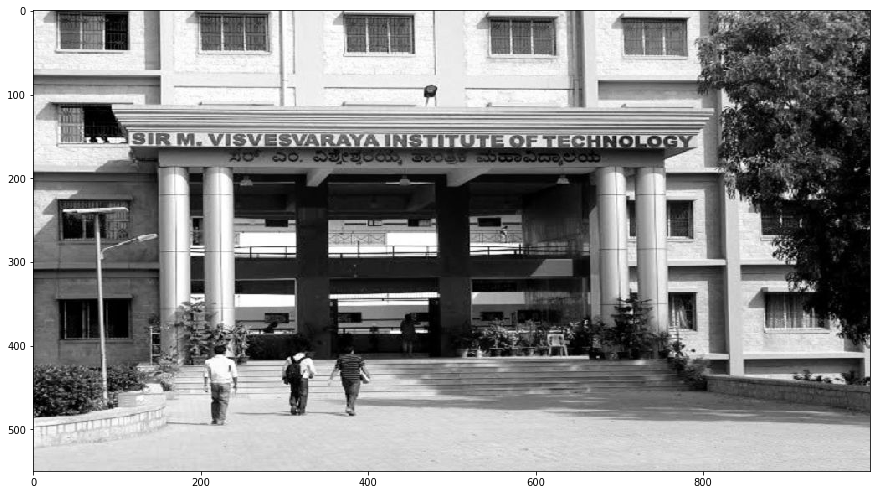

In [124]:
display(original_image)

In [125]:
target_image = cv2.imread('Images/mvit1.jpg',0)

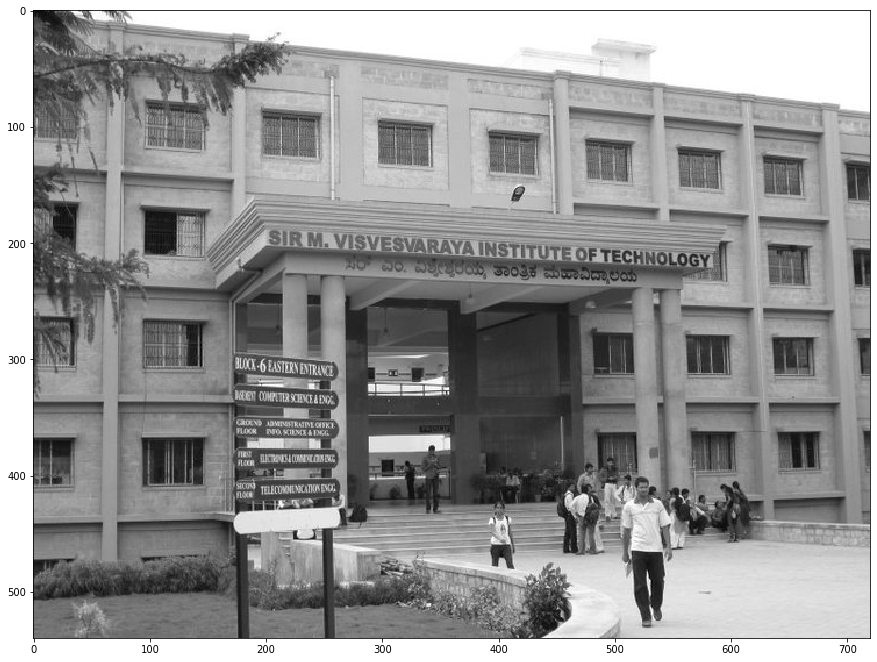

In [126]:
display(target_image)

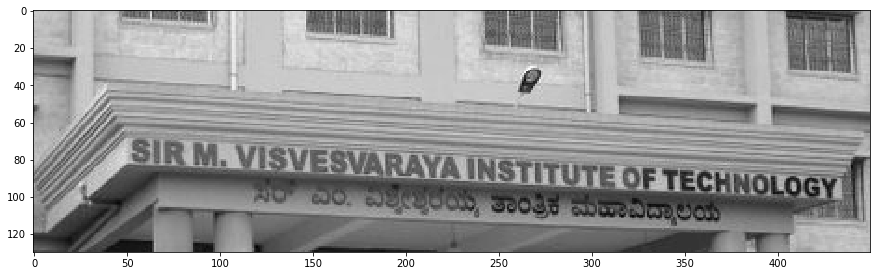

In [127]:
target_image = target_image[120:250,150:600]
display(target_image)

## ORB Descriptors

In [128]:
orb = cv2.ORB_create()

In [129]:
kp1,des1 = orb.detectAndCompute(target_image,None)
kp2,des2 = orb.detectAndCompute(original_image,None)

In [130]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [131]:
matches = bf.match(des1,des2)

In [132]:
matches[:5]

[<DMatch 0x12a004d70>,
 <DMatch 0x129420890>,
 <DMatch 0x129420f70>,
 <DMatch 0x129863650>,
 <DMatch 0x129863d50>]

In [133]:
match = matches[0]
match.distance

67.0

In [134]:
matches = sorted(matches,key=lambda x:x.distance)

In [135]:
target_matches = cv2.drawMatches(target_image,kp1,original_image,kp2,matches[:25],None,flags=2)

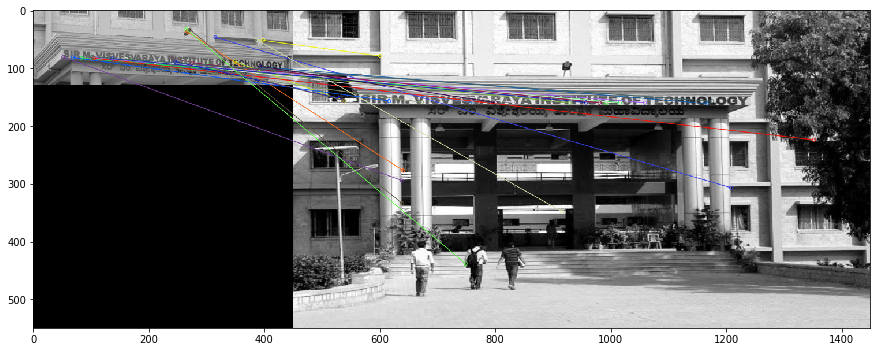

In [136]:
display(target_matches)

## SIFT Descriptors

In [137]:
sift = cv2.xfeatures2d.SIFT_create()

In [138]:
kp1,des1 = orb.detectAndCompute(target_image,None)
kp2,des2 = orb.detectAndCompute(original_image,None)

In [139]:
bf = cv2.BFMatcher()

In [159]:
matches = bf.knnMatch(des1,des2,k=3)

In [160]:
matches[:5]

[[<DMatch 0x129cd72d0>, <DMatch 0x129118070>, <DMatch 0x129118590>],
 [<DMatch 0x129118d70>, <DMatch 0x1291187f0>, <DMatch 0x129118310>],
 [<DMatch 0x129118330>, <DMatch 0x1291180f0>, <DMatch 0x1291182f0>],
 [<DMatch 0x129118030>, <DMatch 0x129118af0>, <DMatch 0x1291185f0>],
 [<DMatch 0x129cef590>, <DMatch 0x129cefa70>, <DMatch 0x129cefa50>]]

In [161]:
len(matches)

283

In [180]:
# Ratio test

good = []

for match1,match2,match3 in matches:
    if match1.distance < 0.9*match2.distance and match1.distance < 0.9*match3.distance:
        good.append([match1])

In [181]:
good

[[<DMatch 0x129cef590>],
 [<DMatch 0x129cef910>],
 [<DMatch 0x129cef8b0>],
 [<DMatch 0x12a0049b0>],
 [<DMatch 0x12a004710>],
 [<DMatch 0x12a004930>],
 [<DMatch 0x12a004ef0>],
 [<DMatch 0x12a004f70>],
 [<DMatch 0x12a004550>],
 [<DMatch 0x129afbdd0>],
 [<DMatch 0x129afb510>],
 [<DMatch 0x129afbb90>],
 [<DMatch 0x129afb7d0>],
 [<DMatch 0x129afb1b0>],
 [<DMatch 0x129afb930>],
 [<DMatch 0x129afb490>],
 [<DMatch 0x12986bcd0>],
 [<DMatch 0x12986b4d0>],
 [<DMatch 0x12986b9d0>],
 [<DMatch 0x12986be30>],
 [<DMatch 0x12986b2f0>],
 [<DMatch 0x12986bdd0>],
 [<DMatch 0x129863e50>],
 [<DMatch 0x1298634f0>],
 [<DMatch 0x1298632b0>],
 [<DMatch 0x129863750>],
 [<DMatch 0x129448e70>],
 [<DMatch 0x129448550>],
 [<DMatch 0x129448570>],
 [<DMatch 0x1294482f0>],
 [<DMatch 0x129448950>],
 [<DMatch 0x129420d10>],
 [<DMatch 0x1294203b0>],
 [<DMatch 0x1294204f0>],
 [<DMatch 0x129420470>],
 [<DMatch 0x129420170>],
 [<DMatch 0x12a760d10>],
 [<DMatch 0x12a760410>],
 [<DMatch 0x12a760810>],
 [<DMatch 0x12a760470>],


In [182]:
sift_match = cv2.drawMatchesKnn(target_image,kp1,original_image,kp2,good,None,flags=2)

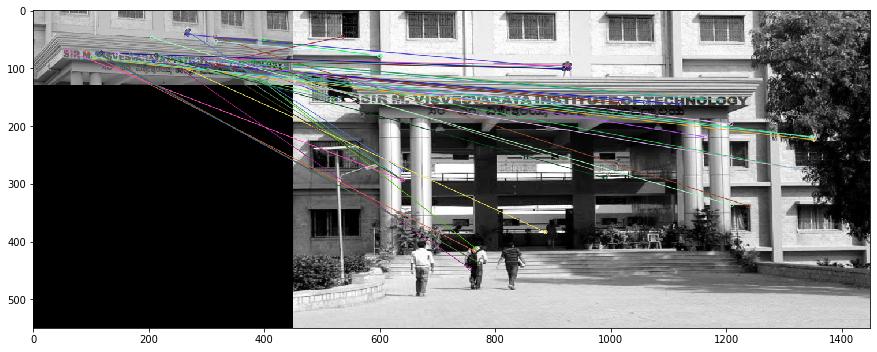

In [183]:
display(sift_match)

## Flann Based Matcher

In [184]:
sift = cv2.xfeatures2d.SIFT_create()

In [185]:
kp1,des1 = orb.detectAndCompute(target_image,None)
kp2,des2 = orb.detectAndCompute(original_image,None)

In [217]:
FLANN = 0
index_params = dict(algorithm=FLANN,trees=3)
search_params = dict(checks=70)

flann = cv2.FlannBasedMatcher(index_params,search_params)

In [218]:
des1,des2

des1 = np.float32(des1)
des2 = np.float32(des2)

In [219]:
matches = flann.knnMatch(des1,des2,k=2)

In [214]:
# Ratio test

good = []

for match1,match2 in matches:
    if match1.distance < 0.9*match2.distance:
        good.append([match1])

In [215]:
flann_matches = cv2.drawMatchesKnn(target_image,kp1,original_image,kp2,good,None,flags=2)

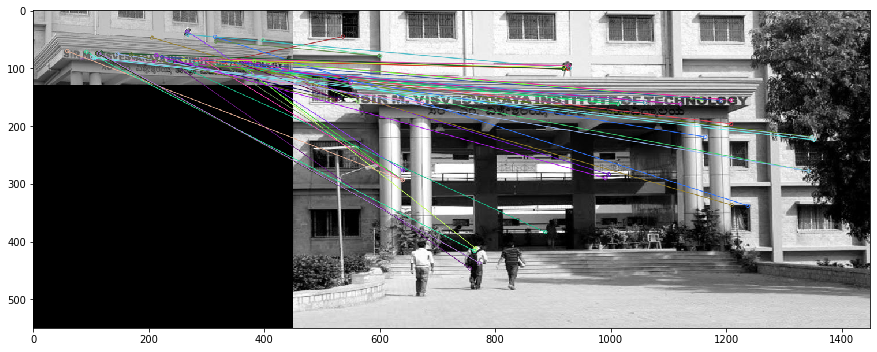

In [216]:
display(flann_matches)